# Clustering algorithms coparision

### Index

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#imp">1. Imports</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#read">2. File reading</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#alg">3. Clustering algorithms</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#clust">4. Clustering method</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#qual">5. Quality metrics method</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#vis">6. Visualizing a labelled dataset</a></strong> </span></p>

<p><span style="color: #0000ff; font-size: large;"><strong>
<a href="#test">7. Testing methods</a></strong> </span></p>

<a name="imp"></a>
### 1. Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch, DBSCAN, KMeans, MiniBatchKMeans, OPTICS, MeanShift, SpectralClustering
from sklearn.cluster import estimate_bandwidth

<a name="read"></a>
### 2. File reading

          0         1         2
0  0.912742  1.719443  1.606405
1  0.313207  1.769782  1.628300
2  1.423678 -0.713694 -0.594431
3 -0.066379  2.153243  1.963148
4  1.036332  0.658611  0.642875


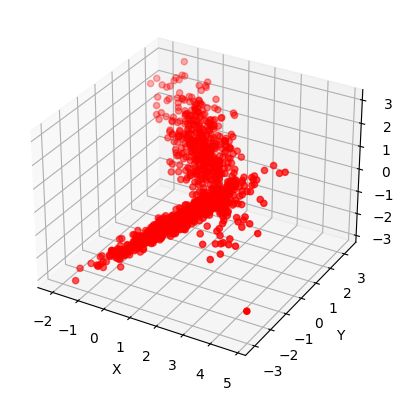

In [51]:
# read txt file
file = pd.read_csv('alvbercau_alvgonfri_dataset.txt', sep=" ", header=None)

# convert to dataframe in order to use pandas methods if needed
df = pd.DataFrame(file)

# show the first 5 rows
print(df.head())

# visualize the data with a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# convert dataframe to numpy array
X = df.values

<a name="alg"></a>
### 3. Clustering algorithms

#### BIRCH

In [52]:
def birch(data, k):
    brc = Birch(n_clusters=k).fit(data)
    labels = brc.predict(data)
    return labels

#### DBSCAN

In [53]:
def dbscan(data, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    return labels

#### K-Means

In [54]:
def kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)
    labels = kmeans.predict(data)
    return labels

#### Mini-Batch K-Means

In [55]:
#Se usa para reducir el tiempo de calculo (Se suele reducir la calidad de los resultados)
def mini_batch_kmeans(data, k):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=6, max_iter=10,n_init=10).fit(data)
    labels = kmeans.predict(data)
    return labels

#### Mean Shift

In [76]:
# parameters quantile and n_samples are used to estimate the bandwidth, which is the hyperparameter of Mean Shift
def mean_shift(data, quantile, n_samples):
    bandwidth = estimate_bandwidth(data, quantile=quantile, n_samples=n_samples)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(data)
    labels = ms.labels_
    return labels

'\ndef mean_shift(data):\n    ms = MeanShift().fit(data)\n    labels = ms.labels_\n    return labels\n'

#### OPTICS

In [57]:
def optics(data, eps, min_samples):
    db = OPTICS(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    return labels

#### Spectral Clustering

In [74]:
def spectral_clustering(data, k):
    sc = SpectralClustering(n_clusters=k, assign_labels="discretize", random_state=0).fit(data)
    labels = sc.labels_
    return labels

#### Mixture of Gaussians

#### Partition around medoids (PAM)

#### UPGMA

<a name="clust"></a>
### 4. Clustering method

In [77]:
def clustering(data, algorithm, hyperparameters):
    if algorithm == 'birch':
        return birch(data, hyperparameters.get('k'))
    elif algorithm == 'dbscan':
        return dbscan(data,  hyperparameters.get('eps'),  hyperparameters.get('min_samples'))
    elif algorithm == 'kmeans':
        return kmeans(data, hyperparameters.get('k'))
    elif algorithm == 'mini_batch_kmeans':
        return mini_batch_kmeans(data, hyperparameters.get('k'))
    elif algorithm == 'mean_shift':
        return mean_shift(data, hyperparameters.get('quantile'),  hyperparameters.get('n_samples'))
    elif algorithm == 'optics':
        return optics(data, hyperparameters.get('eps'),  hyperparameters.get('min_samples'))
    elif algorithm == 'spectral_clustering':
        return spectral_clustering(data, hyperparameters.get('k'))
    elif algorithm == 'mixture_of_gaussians':
        return None
    elif algorithm == 'partition_around_medoids':
        return None
    elif algorithm == 'upgma':
        return None       
    else:
        print("Not valid algorithm")

<a name="qual"></a>
### 5. Quality metrics method

In [59]:
def get_quality_metric(data, labels, metric):
    if metric == 'silhouette':
        return None
    elif metric == 'davies_bouldin':
        return None
    elif metric == 'calinski_harabasz':
        return None
    else:
        print("Not valid metric")

<a name="vis"></a>
### 6. Visualizing a labelled dataset

In [60]:
def visualize_labelled_dataset(data, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

<a name="test"></a>
### 7. Testing methods

The methods defined above are tested with the different clustering algorithms.

#### BIRCH

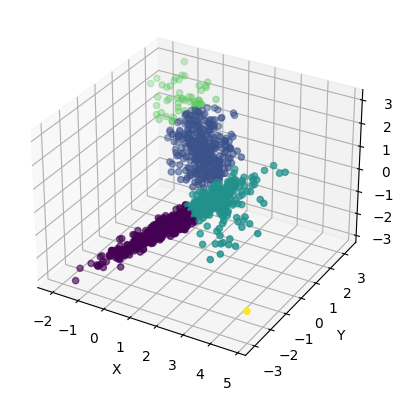

In [61]:
# Birch with 5 clusters
labels = clustering(X, 'birch', {'k': 5})
#print(labels)
visualize_labelled_dataset(X, labels)

#### DBSCAN

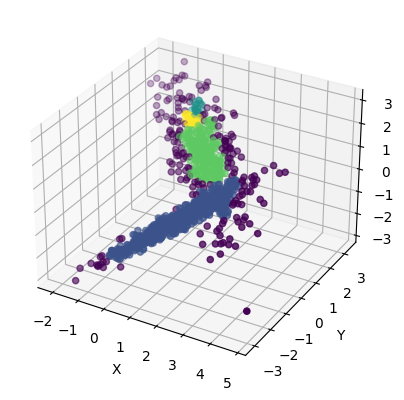

In [62]:
# dbscan 

#labels = clustering(X, 'dbscan', {'eps': 0.15, 'min_samples': 10})
labels = clustering(X, 'dbscan', {'eps': 0.2, 'min_samples': 10})
#labels = clustering(X, 'dbscan', {'eps': 0.2, 'min_samples': 20}) # variamos el número minimo de puntos para que sea considerado un cluster
#labels = clustering(X, 'dbscan', {'eps': 0.25, 'min_samples': 20})
#labels = clustering(X, 'dbscan', {'eps': 0.6, 'min_samples': 100})
#print(labels)
visualize_labelled_dataset(X, labels)

#### K-Means

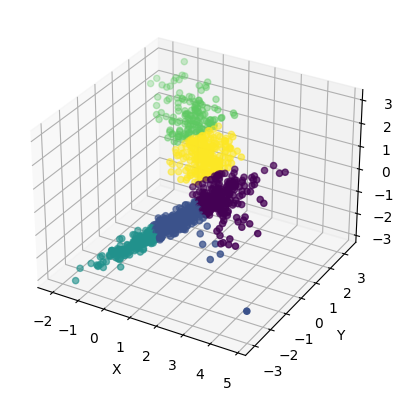

In [63]:
# kmeans with 5 clusters
labels = clustering(X, 'kmeans', {'k': 5})
# print(labels)
visualize_labelled_dataset(X, labels)

#### Mini-Batch K-Means

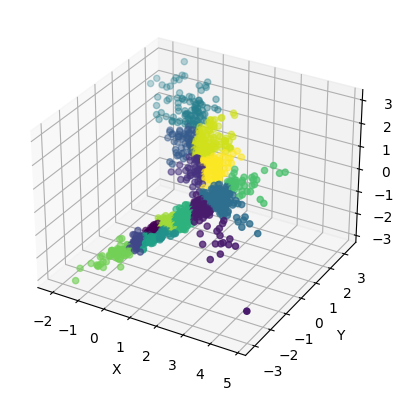

In [64]:
# Mini-batch kmeans with 15 clusters
labels = clustering(X, 'mini_batch_kmeans', {'k': 15})
# print(labels)
visualize_labelled_dataset(X, labels)

#### Mean Shift

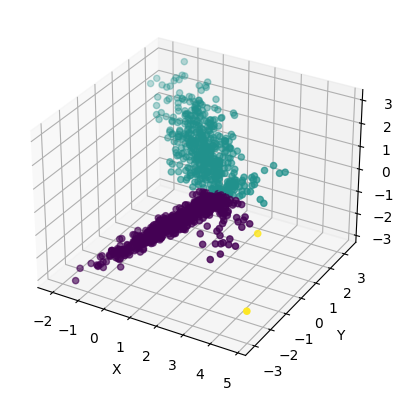

In [91]:
# Mean Shift with quantile=0.2 and n_samples=500
labels = clustering(X, 'mean_shift', {'quantile': 0.2, 'n_samples': 500})
# print(labels)
visualize_labelled_dataset(X, labels)

#### OPTICS

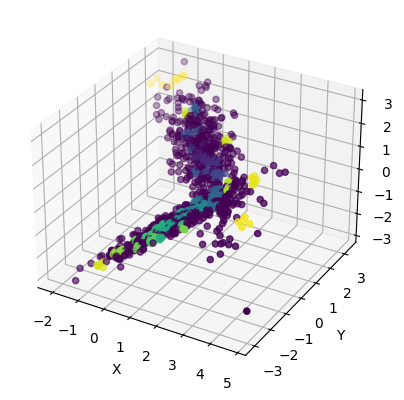

In [66]:
# optics
labels = clustering(X, 'optics', {'eps': 0.75, 'min_samples': 5})
#print(labels)
visualize_labelled_dataset(X, labels)

#### Spectral Clustering

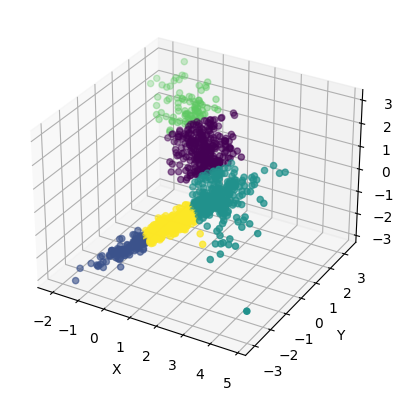

In [75]:
# Spectral Clustering with 5 clusters
labels = clustering(X, 'spectral_clustering', {'k': 5})
# print(labels)
visualize_labelled_dataset(X, labels)

#### Mixture of Gaussians

#### Partition around medoids (PAM)

#### UPGMA